# The Titanic

Data Source: https://www.kaggle.com/c/titanic/data

Today is April 10, 1912. You're feeling a bit nervous, nonetheless excited for your trip. You got your ticket on hand and ready to go. Today you board the Titanic!  

As you make your way to the docks, something catches your eyes from the distance. You can't tell what it is, just that it has some radient glow, so you get closer to it. It's an old worn out book! You pick it up and open it and the first page that comes up is a drawing of a ship sinking! Can this be a sign? You flip to the next page and in large bold text it reads, "THEY WILL DIE". You keep flipping the pages, and it appears to describe who will die in the ship wreck. 

Terrified, you read on to see if any one specified resembles you.

Does the book predict that you will die? Should you board? Let's find out!

### First let's load the data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df = df.drop(columns=['PassengerId'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### It's easier to work with lower case column names, so let's lower case them.

In [3]:
df.columns = [x.lower() for x in df.columns]
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Let's check the types for each variable and count.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


Hmm, looks like we have 891 observations, but note that we are missing some age, cabin, and embarked values! We are going to have to deal with that.

We can either drop the rows where the data is missing **or** we can try to guess.

For `embarked`, we should be able to drop those two observations, since it's just two of them so shouldn't have much of an effect. 

For `ages`, we have two options, one drop those rows, or two fill it in since it's only 177 ages missing. We could give the best guess and fill it in, we'll have to see if there is other information we can use to infer the ages.

For `cabin` we can try to see if there are other values that will help us fill it out or just drop that column altogether.

### Let's just dropped the 2 rows where embarked is blank

In [5]:
df = df.dropna(subset=['embarked']) # Let's just drop it, shouldn't hurt

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
survived    889 non-null int64
pclass      889 non-null int64
name        889 non-null object
sex         889 non-null object
age         712 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
ticket      889 non-null object
fare        889 non-null float64
cabin       202 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


### Now let's see if we convert any column values to numeric or group categories

In [6]:
for column in list(df.columns):
    if df[column].dtype == 'object':
        print(df[column].describe())
        print(' ')

count                                 889
unique                                889
top       Johnson, Master. Harold Theodor
freq                                    1
Name: name, dtype: object
 
count      889
unique       2
top       male
freq       577
Name: sex, dtype: object
 
count          889
unique         680
top       CA. 2343
freq             7
Name: ticket, dtype: object
 
count             202
unique            146
top       C23 C25 C27
freq                4
Name: cabin, dtype: object
 
count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object
 


Looks like `sex` and `embarked` unique values. Sex is either male or female so we can use binary. Embarked only has 3 possible values, so we can use 1, 2, and 3 to represent each value.

In [7]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 1, 'C': 2, 'Q': 3}).astype(int)

df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


### Looks good! Now, let's see what we are working with.

In [8]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.642093,0.524184,0.382452,32.096681,1.362205
std,0.486260,0.834700,0.477538,14.492933,1.103705,0.806761,49.697504,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


They look pretty good, looks we won't be needing to type cast.

### Let's explore a bit more and see if there's any relation between the variables

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1,-0.335549,0.541585,-0.0824459,-0.03404,0.0831508,0.25529,0.108669
pclass,-0.335549,1,-0.127741,-0.365902,0.0816556,0.0168245,-0.548193,0.0438347
sex,0.541585,-0.127741,1,-0.0990372,0.116348,0.247508,0.179958,0.118593
age,-0.0824459,-0.365902,-0.0990372,1,-0.307351,-0.187896,0.0931425,0.0121857
sibsp,-0.03404,0.0816556,0.116348,-0.307351,1,0.414542,0.160887,-0.0606061
parch,0.0831508,0.0168245,0.247508,-0.187896,0.414542,1,0.217532,-0.0793198
fare,0.25529,-0.548193,0.179958,0.0931425,0.160887,0.217532,1,0.0634623
embarked,0.108669,0.0438347,0.118593,0.0121857,-0.0606061,-0.0793198,0.0634623,1


As we can see there isn't any highly correlated variables to `survived`, the highest positive correlation is `sex` **0.541585** followed by `fare` at **0.25529**.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
survived    889 non-null int64
pclass      889 non-null int64
name        889 non-null object
sex         889 non-null int64
age         712 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
ticket      889 non-null object
fare        889 non-null float64
cabin       202 non-null object
embarked    889 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# Available attributes:
feature_cols = ['sex', 'fare'] # embarked lowered it
X = df[feature_cols] # Features
y = df['survived'] # Target variable

# Split 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8258426966292135


Just using the two most correlated features to `survived` using a Decision Tree gives a **82.58%** accuracy which is better than flipping a coin.

### We are at 82.58% accuracy, let's see if we can do better

In [12]:
df.isna().any()

survived    False
pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare        False
cabin        True
embarked    False
dtype: bool

### If you recall from earlier, we still have to deal with missing ages and cabin values.

In [13]:
df[df['age'].isnull()] # all rows where age is NaN

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,3
17,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,1
19,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,2
26,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,2
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,3
29,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,NaN,1
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,2
32,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,NaN,3
36,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,NaN,2
42,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,NaN,2


### We can guess the ages to be the average age, based on gender.

Average men age is:

In [14]:
df_men = df.loc[df['sex'] == 0] # data frame with males
men_mean = df_men['age'].mean()
print(men_mean)

30.72664459161148


Average women age is:

In [15]:
df_women = df.loc[df['sex'] == 1] # data frame with females
women_mean = df_women['age'].mean()
print(women_mean)

27.745173745173744


In [16]:
df.loc[(df['sex'] == 0) & (df['age'].isnull()), ['age']] = men_mean
df.loc[(df['sex'] == 1) & (df['age'].isnull()), ['age']] = women_mean

df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
survived    889 non-null int64
pclass      889 non-null int64
name        889 non-null object
sex         889 non-null int64
age         889 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
ticket      889 non-null object
fare        889 non-null float64
cabin       202 non-null object
embarked    889 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


### Let's replace empty cabin cells with "Unknown" string

In [18]:
df.loc[df['cabin'].isnull(), ['cabin']] = 'Unknown'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
survived    889 non-null int64
pclass      889 non-null int64
name        889 non-null object
sex         889 non-null int64
age         889 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
ticket      889 non-null object
fare        889 non-null float64
cabin       889 non-null object
embarked    889 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


### Now let's check what are the values for cabins by analyzing the strings and substrings in it

In [19]:
substrings_counter = {}

def strCounter(string):
    string_list = string.split()
    
    for strn in string_list:
        
        if strn in substrings_counter:
            substrings_counter[strn] += 1
        else:
           substrings_counter[strn] = 1 
    
df['cabin'].map(strCounter)
print('Unique occurances:', len(substrings_counter))
print(substrings_counter)


Unique occurances: 161
{'Unknown': 687, 'C85': 1, 'C123': 2, 'E46': 1, 'G6': 4, 'C103': 1, 'D56': 1, 'A6': 1, 'C23': 4, 'C25': 4, 'C27': 4, 'B78': 1, 'D33': 2, 'B30': 1, 'C52': 2, 'C83': 2, 'F33': 3, 'F': 4, 'G73': 2, 'E31': 1, 'A5': 1, 'D10': 1, 'D12': 1, 'D26': 2, 'C110': 1, 'B58': 2, 'B60': 2, 'E101': 3, 'E69': 1, 'D47': 1, 'B86': 1, 'F2': 3, 'C2': 2, 'E33': 2, 'B19': 1, 'A7': 1, 'C49': 1, 'F4': 2, 'A32': 1, 'B4': 1, 'B80': 1, 'A31': 1, 'D36': 2, 'D15': 1, 'C93': 2, 'C78': 2, 'D35': 2, 'C87': 1, 'B77': 2, 'E67': 2, 'B94': 1, 'C125': 2, 'C99': 1, 'C118': 1, 'D7': 1, 'A19': 1, 'B49': 2, 'D': 3, 'C22': 3, 'C26': 3, 'C106': 1, 'C65': 2, 'E36': 1, 'C54': 1, 'B57': 2, 'B59': 2, 'B63': 2, 'B66': 2, 'C7': 1, 'E34': 1, 'C32': 1, 'B18': 2, 'C124': 2, 'C91': 1, 'E40': 1, 'T': 1, 'C128': 1, 'D37': 1, 'B35': 2, 'E50': 1, 'C82': 1, 'B96': 4, 'B98': 4, 'E10': 1, 'E44': 2, 'A34': 1, 'C104': 1, 'C111': 1, 'C92': 2, 'E38': 1, 'D21': 1, 'E12': 1, 'E63': 1, 'A14': 1, 'B37': 1, 'C30': 1, 'D20': 2, 'B79'

It looks like all the cabins start with a letter followed by letters. We can create a new deck feature based on the first string!

In [20]:
cabinCounter = {}
for cabin in substrings_counter:    
    start_letter = cabin[0]
    
    if start_letter in cabinCounter:
            cabinCounter[start_letter] += 1
    else:
       cabinCounter[start_letter] = 1 
    
print(cabinCounter)


{'U': 1, 'C': 46, 'E': 24, 'G': 3, 'D': 26, 'A': 15, 'B': 40, 'F': 5, 'T': 1}


In [21]:
cabins = list(cabinCounter.keys())
print(cabins)

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']


In [22]:
df['xdeck'] = df['cabin'].map(lambda cabin: cabin[0])

# Convert to numerical values
df['xdeck'] = df['xdeck'].map({'U': 1, 'C': 2, 'E': 3, 'G': 4, 'D': 5, 'A': 6, 'B':7 , 'F': 8, 'T': 9}).astype(int)

df['xdeck'].head()

0    1
1    2
2    1
3    2
4    1
Name: xdeck, dtype: int64

### Let's also create a new freature for family size

In [23]:
df['xfamily_size'] = df['sibsp'] + df['parch']

### Let's now extract the name titles

First we want to parse each name and look for the title which ends with a period(.)

In [24]:
substrings_counter = {}

df['name'].map(strCounter)
print('Unique occurances:', len(substrings_counter))

titles = []

for strn in substrings_counter:
    if strn[-1] == '.':
        print(strn)
        titles.append(strn)

print('Titles found:', len(titles))
print(titles)

Unique occurances: 1669
Mr.
Mrs.
Miss.
Master.
Don.
Rev.
Dr.
Mme.
Ms.
Major.
L.
Lady.
Sir.
Mlle.
Col.
Capt.
Countess.
Jonkheer.
Titles found: 18
['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'L.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess.', 'Jonkheer.']


As we can see there were 18 possible titles. Though I am not sure what L is, might just be a middle initial.

In [25]:

def getTitle(name_str):
    for title in titles:
        if name_str.find(title) != -1:
            return title[:-1]
    
    return 'Unknown'

df['xtitle'] = df['name'].map(getTitle)

# Convert to numerical values
df['xtitle'] = df['xtitle'].map({'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Don': 5, 'Rev': 6, 'Dr': 7, 'Mme': 8, 'Ms': 9, 'Major': 10, 'L': 11, 'Lady': 12, 'Sir': 13, 'Mlle': 14, 'Col': 15, 'Capt': 16, 'Countess': 17, 'Jonkheer': 18, 'Unknown': 19}).astype(int)

df['xtitle'].head(1)

0    1
Name: xtitle, dtype: int64

### Let's check out the age distribution

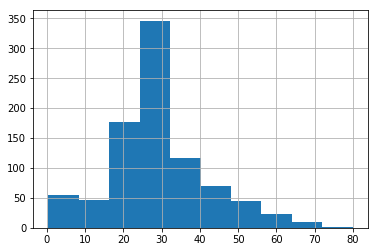

In [26]:
df['age'].hist()

In [27]:
count, division = np.histogram(df['age'])

print(division)

[ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]


In [28]:

df['xagegroup'] = df['age'].astype(int)

df.loc[(df['age'] >= 0)  & (df['age'] <= 8), 'xagegroup']  = 0
df.loc[(df['age'] > 8)  & (df['age'] <= 16), 'xagegroup'] = 1
df.loc[(df['age'] > 16) & (df['age'] <= 24), 'xagegroup'] = 2
df.loc[(df['age'] > 24) & (df['age'] <= 32), 'xagegroup'] = 3
df.loc[(df['age'] > 32) & (df['age'] <= 40), 'xagegroup'] = 4
df.loc[(df['age'] > 40) & (df['age'] <= 48), 'xagegroup'] = 5
df.loc[(df['age'] > 48) & (df['age'] <= 56), 'xagegroup'] = 6
df.loc[(df['age'] > 56) & (df['age'] <= 64), 'xagegroup'] = 7
df.loc[(df['age'] > 64) & (df['age'] <= 72), 'xagegroup'] = 8
df.loc[(df['age'] > 72) & (df['age'] <= 80), 'xagegroup'] = 9
df.loc[ df['age'] > 80, 'xagegroup'] = 10


### Let's check out the fare distribution

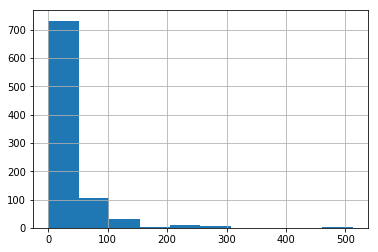

In [29]:
df['fare'].hist()


In [30]:
count, division = np.histogram(df['fare'])

print(division)

[  0.       51.23292 102.46584 153.69876 204.93168 256.1646  307.39752
 358.63044 409.86336 461.09628 512.3292 ]


In [31]:
df['xfare'] = df['fare'].astype(int)

df.loc[(df['fare'] > 0)     & (df['fare'] <= 51.12), 'xfare'] = 0
df.loc[(df['fare'] > 51.12) & (df['fare'] <= 102.40), 'xfare'] = 1
df.loc[(df['fare'] > 102.40) & (df['fare'] <= 153.60), 'xfare'] = 2
df.loc[(df['fare'] > 153.60) & (df['fare'] <= 204.80), 'xfare'] = 3
df.loc[(df['fare'] > 204.80) & (df['fare'] <= 256.00), 'xfare'] = 4
df.loc[(df['fare'] > 256.00) & (df['fare'] <= 307.20) , 'xfare'] = 5
df.loc[(df['fare'] > 307.20) & (df['fare'] <= 358.40) , 'xfare'] = 6
df.loc[(df['fare'] > 358.40) & (df['fare'] <= 409.60) , 'xfare'] = 7
df.loc[(df['fare'] > 409.60) & (df['fare'] <= 460.80) , 'xfare'] = 8
df.loc[(df['fare'] > 460.80) & (df['fare'] <= 512.00) , 'xfare'] = 9
df.loc[df['fare'] > 512.00, 'xfare'] = 10



In [32]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,xdeck,xfamily_size,xtitle,xagegroup,xfare
survived,1,-0.335549,0.541585,-0.0858317,-0.03404,0.0831508,0.25529,0.108669,0.265083,0.0182775,0.281669,-0.0734832,0.227511
pclass,-0.335549,1,-0.127741,-0.327265,0.0816556,0.0168245,-0.548193,0.0438347,-0.559426,0.0642205,-0.191838,-0.327139,-0.468825
sex,0.541585,-0.127741,1,-0.109665,0.116348,0.247508,0.179958,0.118593,0.106712,0.203191,0.347728,-0.0931917,0.145691
age,-0.0858317,-0.327265,-0.109665,1,-0.236473,-0.181569,0.0861498,0.00297316,0.157638,-0.252356,-0.072248,0.984743,0.0878346
sibsp,-0.03404,0.0816556,0.116348,-0.236473,1,0.414542,0.160887,-0.0606061,-0.0519654,0.890654,0.141651,-0.226097,0.0957694
parch,0.0831508,0.0168245,0.247508,-0.181569,0.414542,1,0.217532,-0.0793198,0.0403755,0.782988,0.130188,-0.169176,0.141578
fare,0.25529,-0.548193,0.179958,0.0861498,0.160887,0.217532,1,0.0634623,0.374545,0.218658,0.105288,0.0919051,0.974596
embarked,0.108669,0.0438347,0.118593,0.00297316,-0.0606061,-0.0793198,0.0634623,1,0.0211124,-0.0810573,0.0863677,-0.00752566,0.0715443
xdeck,0.265083,-0.559426,0.106712,0.157638,-0.0519654,0.0403755,0.374545,0.0211124,1,-0.0153472,0.185784,0.15779,0.335851
xfamily_size,0.0182775,0.0642205,0.203191,-0.252356,0.890654,0.782988,0.218658,-0.0810573,-0.0153472,1,0.161869,-0.239071,0.136199


In [33]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'xdeck', 'xfamily_size', 'xtitle',
       'xagegroup', 'xfare'],
      dtype='object')

### We can now try to seee if there's any improvement using some of the new features

We can quickly train and test for RandomForestClassifier, DecisionTreeClassifier, and LogisticRegression 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Full Features available see above
feature_cols = ['sex', 'xdeck', 'xfamily_size', 'xtitle']
X = df[feature_cols] # Features
y = df['survived'] # Target variable


for clsf in [RandomForestClassifier, DecisionTreeClassifier, LogisticRegression]:

    # Split 20/80
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

    clf = RandomForestClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.848314606741573
Accuracy: 0.8314606741573034
Accuracy: 0.8370786516853933


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy is only *slightly* better.

### Now it's time to validate our data with the test data provided in kaggle

In [35]:
test_df = pd.read_csv('titanic/test.csv')

test_df.columns = [x.lower() for x in test_df.columns]

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
passengerid    418 non-null int64
pclass         418 non-null int64
name           418 non-null object
sex            418 non-null object
age            332 non-null float64
sibsp          418 non-null int64
parch          418 non-null int64
ticket         418 non-null object
fare           417 non-null float64
cabin          91 non-null object
embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Apply all the transformations as the validation test set

In [36]:
# Sex binarization
test_df['sex'] = test_df['sex'].map({'male': 0, 'female': 1})

# Embarked categories
test_df['embarked'] = test_df['embarked'].map({'S': 1, 'C': 2, 'Q': 3}).astype(int)

# Mean ages
df_men = test_df.loc[test_df['sex'] == 0] # data frame with males
men_mean = df_men['age'].mean()

df_women = test_df.loc[test_df['sex'] == 1] # data frame with females
women_mean = df_women['age'].mean()

# Missing age
test_df.loc[(test_df['sex'] == 0) & (test_df['age'].isnull()), ['age']] = men_mean
test_df.loc[(test_df['sex'] == 1) & (test_df['age'].isnull()), ['age']] = women_mean

# Test data is missing one fare value. It's for a passenger in plcass 3
# test_df.loc[test_df['pclass'] == 3].mean() # Belongs to pclass 3. Yields 12.459678
test_df.loc[test_df['fare'].isnull(), ['fare']] = 12.459678

# Family size feature
test_df['xfamily_size'] = test_df['sibsp'] + test_df['parch']

# Deck feature
test_df.loc[test_df['cabin'].isnull(), ['cabin']] = 'Unknown'
test_df['xdeck'] = test_df['cabin'].map(lambda cabin: cabin[0])

# Convert to numerical values
test_df['xdeck'] = test_df['xdeck'].map({'U': 1, 'C': 2, 'E': 3, 'G': 4, 'D': 5, 'A': 6, 'B':7 , 'F': 8, 'T': 9}).astype(int)

# Title feature
test_df['xtitle'] = test_df['name'].map(getTitle)

# Convert to numerical values
test_df['xtitle'] = test_df['xtitle'].map({'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Don': 5, 'Rev': 6, 'Dr': 7, 'Mme': 8, 'Ms': 9, 'Major': 10, 'L': 11, 'Lady': 12, 'Sir': 13, 'Mlle': 14, 'Col': 15, 'Capt': 16, 'Countess': 17, 'Jonkheer': 18, 'Unknown': 19}).astype(int)

# Fare groups
test_df['xfare'] = test_df['fare'].astype(int)
test_df.loc[(test_df['fare'] >= 0)     & (test_df['fare'] <= 51.12), 'xfare'] = 0
test_df.loc[(test_df['fare'] > 51.12) & (test_df['fare'] <= 102.40), 'xfare'] = 1
test_df.loc[(test_df['fare'] > 102.40) & (test_df['fare'] <= 153.60), 'xfare'] = 2
test_df.loc[(test_df['fare'] > 153.60) & (test_df['fare'] <= 204.80), 'xfare'] = 3
test_df.loc[(test_df['fare'] > 204.80) & (test_df['fare'] <= 256.00), 'xfare'] = 4
test_df.loc[(test_df['fare'] > 256.00) & (test_df['fare'] <= 307.20) , 'xfare'] = 5
test_df.loc[(test_df['fare'] > 307.20) & (test_df['fare'] <= 358.40) , 'xfare'] = 6
test_df.loc[(test_df['fare'] > 358.40) & (test_df['fare'] <= 409.60) , 'xfare'] = 7
test_df.loc[(test_df['fare'] > 409.60) & (test_df['fare'] <= 460.80) , 'xfare'] = 8
test_df.loc[(test_df['fare'] > 460.80) & (test_df['fare'] <= 512.00) , 'xfare'] = 9
test_df.loc[test_df['fare'] > 512.00, 'xfare'] = 10

# Age groups
test_df['xagegroup'] = test_df['age'].astype(int)
test_df.loc[(test_df['age'] >= 0)  & (test_df['age'] <= 8), 'xagegroup']  = 0
test_df.loc[(test_df['age'] > 8)  & (test_df['age'] <= 16), 'xagegroup'] = 1
test_df.loc[(test_df['age'] > 16) & (test_df['age'] <= 24), 'xagegroup'] = 2
test_df.loc[(test_df['age'] > 24) & (test_df['age'] <= 32), 'xagegroup'] = 3
test_df.loc[(test_df['age'] > 32) & (test_df['age'] <= 40), 'xagegroup'] = 4
test_df.loc[(test_df['age'] > 40) & (test_df['age'] <= 48), 'xagegroup'] = 5
test_df.loc[(test_df['age'] > 48) & (test_df['age'] <= 56), 'xagegroup'] = 6
test_df.loc[(test_df['age'] > 56) & (test_df['age'] <= 64), 'xagegroup'] = 7
test_df.loc[(test_df['age'] > 64) & (test_df['age'] <= 72), 'xagegroup'] = 8
test_df.loc[(test_df['age'] > 72) & (test_df['age'] <= 80), 'xagegroup'] = 9
test_df.loc[test_df['age'] > 80, 'xagegroup'] = 10

test_df.describe()

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked,xfamily_size,xdeck,xtitle,xfare,xagegroup
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272597,0.447368,0.392344,35.571764,1.464115,0.839713,1.734450,1.863636,0.385167,3.179426
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.851997,0.685516,1.519072,1.750316,1.644136,1.076218,1.562098
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,1100.500000,3.000000,0.000000,30.272362,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000,1.000000,1.000000,3.000000,0.000000,4.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,3.000000,10.000000,8.000000,19.000000,10.000000,9.000000


In [37]:

# RandomForestClassifier or DecisionTreeClassifier or LogisticRegression
clf = RandomForestClassifier() 

feature_cols =  ['sex', 'xdeck', 'xfamily_size', 'xtitle'] # features to use

X = df[feature_cols] # Features
y = df['survived'] # Target variable

X_train = X
y_train =  y

X_test = test_df[feature_cols]

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


test_df['survived'] = y_pred
    
# PassengerId and Survived    
test_df.head()

# Export to csv, only columns PassengerId and Survived  
test_df[['passengerid', 'survived']].to_csv('predictions.csv', index=False)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
